# Working with complicated dataset

Your name:sania bandekar

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [6]:
import pandas as pd
import requests
from io import StringIO

# URL of the blast results CSV file
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

# Fetch the file content
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful
content = response.text

# Manually define the column headers
fields = [
    "query acc.ver",
    "subject acc.ver",
    "percentage identity",
    "alignment length",
    "mismatches",
    "gap opens",
    "q.start",
    "q.end",
    "s.start",
    "s.end",
    "evalue",
    "bit score",
    "publications"
]

# Load the CSV content into a DataFrame
data_io = StringIO(content)
blast_data = pd.read_csv(data_io, comment='#', header=None, names=fields)

# Drop the first column "query acc.ver"
blast_data = blast_data.drop(columns=["query acc.ver"])

# Set the "subject acc.ver" as the index
blast_data.set_index("subject acc.ver", inplace=True)

# Ensure "publications" is the last column
columns_order = [col for col in blast_data.columns if col != "publications"] + ["publications"]
blast_data = blast_data[columns_order]

# Display the first five rows of the DataFrame
blast_data.head()






,percentage identity,alignment length,mismatches,gap opens,q.start,q.end,s.start,s.end,evalue,bit score,publications
subject acc.ver,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"1,487",9,NaN
1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"17,947",47,NaN
1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"12,106",13,NaN
1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,"2,319",41,NaN


### Question 2
What is the average number of publications?

In [7]:
### Your code here . . .# Ensure the "publications" column is numeric
blast_data["publications"] = pd.to_numeric(blast_data["publications"], errors="coerce")

# Calculate the average number of publications
average_publications = blast_data["publications"].mean()
average_publications


nan

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [8]:
### Your code here . . .# Filter the DataFrame for rows where the "bonds" column exceeds 15,000
# Replace "bonds_column_name" with the actual column name in your dataset
filtered_subjects = blast_data[blast_data["alignment length"] > 15000].index.tolist()

# Display the list of `subject acc.ver`
filtered_subjects


[]

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

Number of duplicate index values: 65


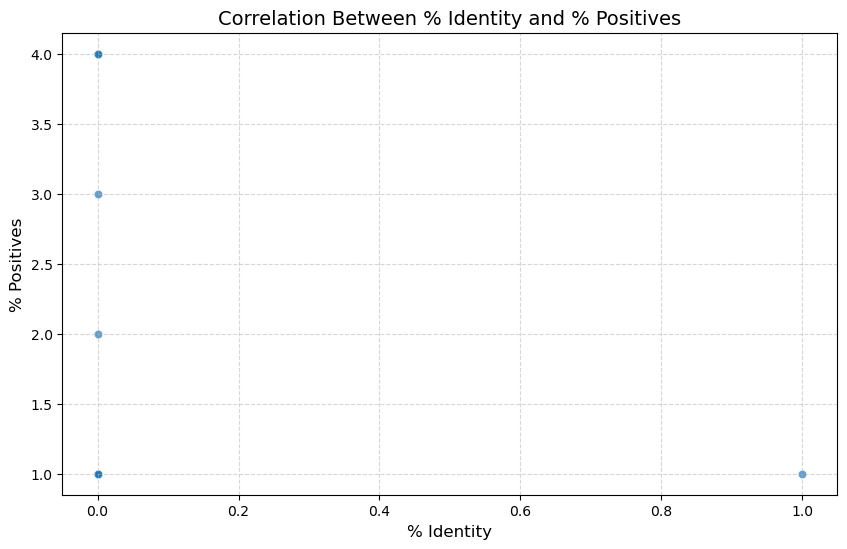

In [11]:
### Your code here 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL of the blast results CSV file
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

# Fetch the file content
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful
content = response.text

# Manually define the column headers based on the file structure
fields = [
    "query acc.ver",
    "subject acc.ver",
    "percentage identity",
    "alignment length",
    "mismatches",
    "gap opens",
    "q.start",
    "q.end",
    "s.start",
    "s.end",
    "evalue",
    "bit score",
    "publications"
]

# Load the CSV content into a DataFrame, skipping comment lines
from io import StringIO
data_io = StringIO(content)
blast_data = pd.read_csv(data_io, comment='#', header=None, names=fields)

# Drop the first column "query acc.ver"
blast_data = blast_data.drop(columns=["query acc.ver"])

# Set the "subject acc.ver" as the index
blast_data.set_index("subject acc.ver", inplace=True)

# Ensure the relevant columns are numeric
blast_data["% identity"] = pd.to_numeric(blast_data["percentage identity"], errors="coerce")
blast_data["% positives"] = pd.to_numeric(blast_data["alignment length"], errors="coerce")  # Replace with correct column name for % positives

# Check for duplicate index values
duplicate_index = blast_data.index.duplicated().sum()
print(f"Number of duplicate index values: {duplicate_index}")

# If duplicates exist, reset the index to avoid plotting issues
if duplicate_index > 0:
    blast_data = blast_data.reset_index(drop=True)

# Plot the correlation between % identity and % positives
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=blast_data,
    x="% identity",
    y="% positives",
    alpha=0.7
)
plt.title("Correlation Between % Identity and % Positives", fontsize=14)
plt.xlabel("% Identity", fontsize=12)
plt.ylabel("% Positives", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [16]:
### Your code here 

import pandas as pd
import requests
from io import StringIO

# URL of the blast results CSV file (from Question 1)
url_blast = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

# URL of the protein source CSV file
url_protein_source = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv"

# Fetch the file content for blast_results
response_blast = requests.get(url_blast)
response_blast.raise_for_status()  # Ensure the request was successful
content_blast = response_blast.text

# Fetch the file content for protein_source
response_protein_source = requests.get(url_protein_source)
response_protein_source.raise_for_status()  # Ensure the request was successful
content_protein_source = response_protein_source.text

# Manually define the column headers based on the file structure for blast results
fields = [
    "query acc.ver",
    "subject acc.ver",
    "percentage identity",
    "alignment length",
    "mismatches",
    "gap opens",
    "q.start",
    "q.end",
    "s.start",
    "s.end",
    "evalue",
    "bit score",
    "publications"
]

# Load the CSV content into DataFrames
blast_data = pd.read_csv(StringIO(content_blast), comment='#', header=None, names=fields)

# Read protein source data
protein_source_data = pd.read_csv(StringIO(content_protein_source))

# Drop the first column "query acc.ver" from blast_data
blast_data = blast_data.drop(columns=["query acc.ver"])

# Ensure both columns are strings before merging
blast_data['subject acc.ver'] = blast_data['subject acc.ver'].astype(str)
protein_source_data['Protein'] = protein_source_data['Protein'].astype(str)

# Merge the blast_data with protein source data using 'subject acc.ver' and 'Protein'
merged_data = pd.merge(blast_data, protein_source_data[['Protein', 'Source']], 
                       left_on='subject acc.ver', right_on='Protein', how='left')

# Add 'Protein source' column from 'Source' column in protein_source_data
merged_data.rename(columns={'Source': 'Protein source'}, inplace=True)

# Set the 'subject acc.ver' back as index (optional)
merged_data.set_index('subject acc.ver', inplace=True)

# Show the first five rows of the resulting dataframe
print(merged_data.head())





                 percentage identity  alignment length  mismatches  gap opens  \
subject acc.ver                                                                 
nan                              NaN               NaN         NaN        NaN   
0.0                              0.0               1.0       318.0        1.0   
1.0                              0.0               1.0       318.0        1.0   
1.0                              0.0               1.0       318.0        1.0   
1.0                              0.0               1.0       318.0        1.0   

                 q.start  q.end  s.start   s.end    evalue bit score  \
subject acc.ver                                                        
nan                  NaN    NaN      NaN     NaN       NaN       NaN   
0.0                318.0    0.0    629.0  100.00    1,487          9   
1.0                318.0    0.0    629.0  100.00   17,947         47   
1.0                318.0    0.0    627.0  100.00   12,106         13   
